## About the Dataset

### Context

Cirrhosis of the liver is late stage scarring of the liver which is caused by other liver diseases and conditions like hepatitis and chronic alcoholism. This data used in my predictive analysis was collected by the Mayo Clinic in their primary biliary cirrhosis of the liver trial which was conduicted between 1974 and 1984.

There were 424 patients that were referred to this trial during the 10 years and they met the criteria for the placebo-controlled trial of the drug D-penicillamine.

### Attribute Information

1) ID: unique identifier \
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 \
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death) \
4) Drug: type of drug D-penicillamine or placebo \
5) Age: age in [days] \
6) Sex: M (male) or F (female) \
7) Ascites: presence of ascites N (No) or Y (Yes) \
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes) \
9) Spiders: presence of spiders N (No) or Y (Yes) \
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy) \
11) Bilirubin: serum bilirubin in [mg/dl] \
12) Cholesterol: serum cholesterol in [mg/dl] \
13) Albumin: albumin in [gm/dl] \
14) Copper: urine copper in [ug/day] \
15) Alk_Phos: alkaline phosphatase in [U/liter] \
16) SGOT: SGOT in [U/ml] \
17) Triglycerides: triglicerides in [mg/dl] \
18) Platelets: platelets per cubic [ml/1000] \
19) Prothrombin: prothrombin time in seconds [s] \
20) Stage: histologic stage of disease (1, 2, 3, or 4)

### Acknowledgements

Fleming, T.R. and Harrington, D.P. (1991) Counting Processes and Survival Analysis. Wiley Series in Probability and Mathematical Statistics: Applied Probability and Statistics, John Wiley and Sons Inc., New York.

fedesoriano. (August 2021). Cirrhosis Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset.

## Data Cleaning and Preprocessing

In [3]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from sklearn import tree

In [4]:
#Reads the dataset
cirr_df = pd.read_csv(r"cirrhosis.csv")

In [5]:
cirr_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
#Drops the ID column because it is not being used in the predictive models
cirr_df.drop(columns = "ID",inplace=True)

In [7]:
##Drops the rows where there are NULL values
cirr_df.fillna('',inplace=True)
for col in cirr_df:
    cirr_df.drop(cirr_df[cirr_df[col]==""].index,inplace=True)

In [8]:
##Confirms that these rows were dropped
cirr_df.shape

(276, 19)

In [9]:
#Data Types for each variable
cirr_df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol       object
Albumin          float64
Copper            object
Alk_Phos          object
SGOT              object
Tryglicerides     object
Platelets         object
Prothrombin       object
Stage             object
dtype: object

In [10]:
#Converts the data types into either floats or integers
#Then converts to numeric values
for col in ["Alk_Phos","SGOT","Platelets"]:
    cirr_df[col].astype(float)
    cirr_df[col] = pd.to_numeric(cirr_df[col], errors='coerce')
for col in ["Cholesterol","Copper","Tryglicerides","Platelets","Stage"]:
    cirr_df[col].astype(int)
    cirr_df[col] = pd.to_numeric(cirr_df[col], errors='coerce')

In [11]:
#Verifies the changes
cirr_df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin       object
Stage            float64
dtype: object

#EDA

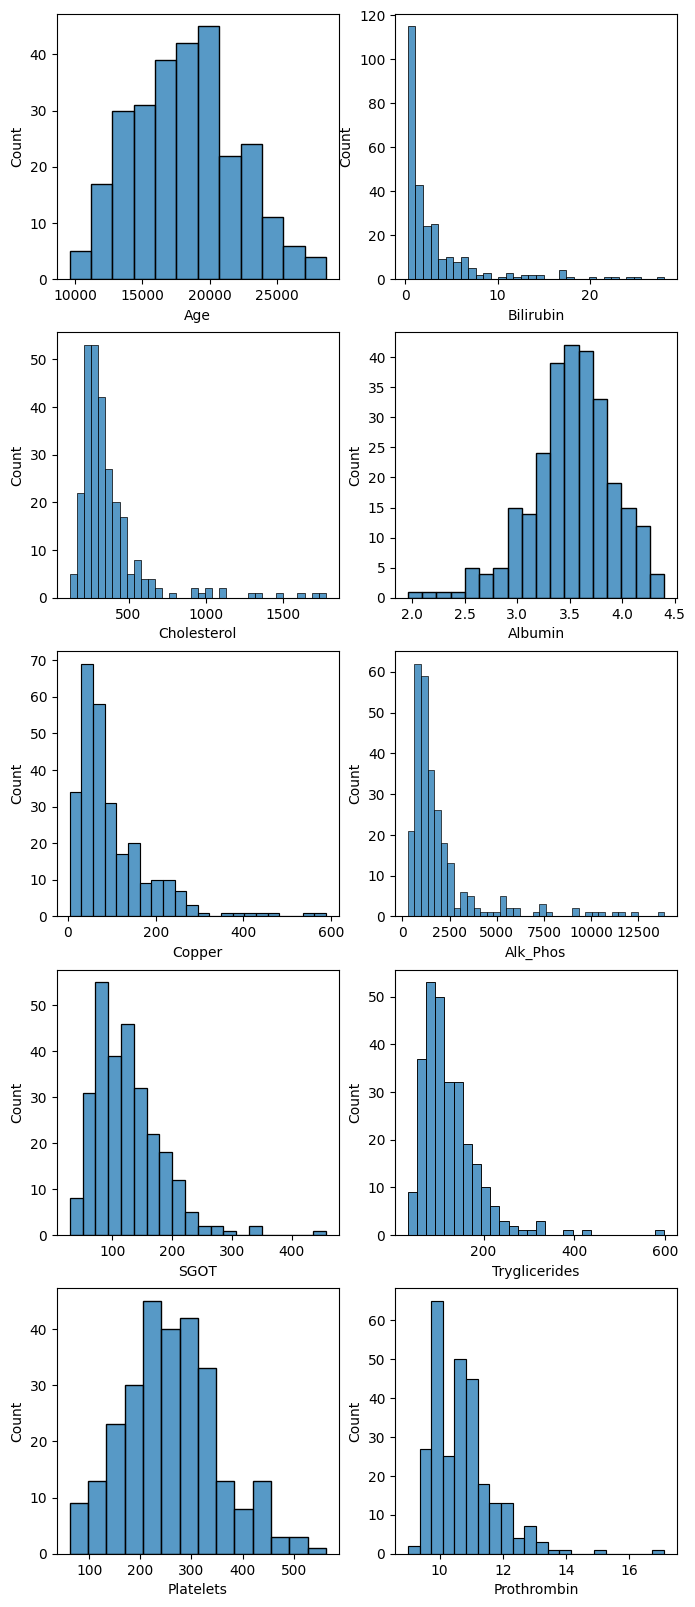

In [12]:
##Plots the graphs
quant_vars = ["Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos" , "SGOT", "Tryglicerides", "Platelets", "Prothrombin"]
_, axes = plt.subplots(5, 2, figsize = (8, 5*4))
for index, col in enumerate(quant_vars):
    hor = index%2
    ver = index//2
    sns.histplot(data = cirr_df[col], ax = axes[ver, hor])

From the graphs it can be seen that all of the quantitative variables have significant amounts of outliers besides Age and Platelets. The next step in the data cleaning step is replacing the outlier variables with the median.

In [13]:
#Features with outliers
vars = ["Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos" , "SGOT", "Tryglicerides", "Prothrombin"]

#Outliers were removed
threshold = 3
for col in vars:
    cirr_df[col] = pd.to_numeric(cirr_df[col], errors='coerce')
    z_scores = stats.zscore(cirr_df[col])
    cirr_df.loc[z_scores>threshold,col]=cirr_df[col].median()


In [14]:
cirr_df.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


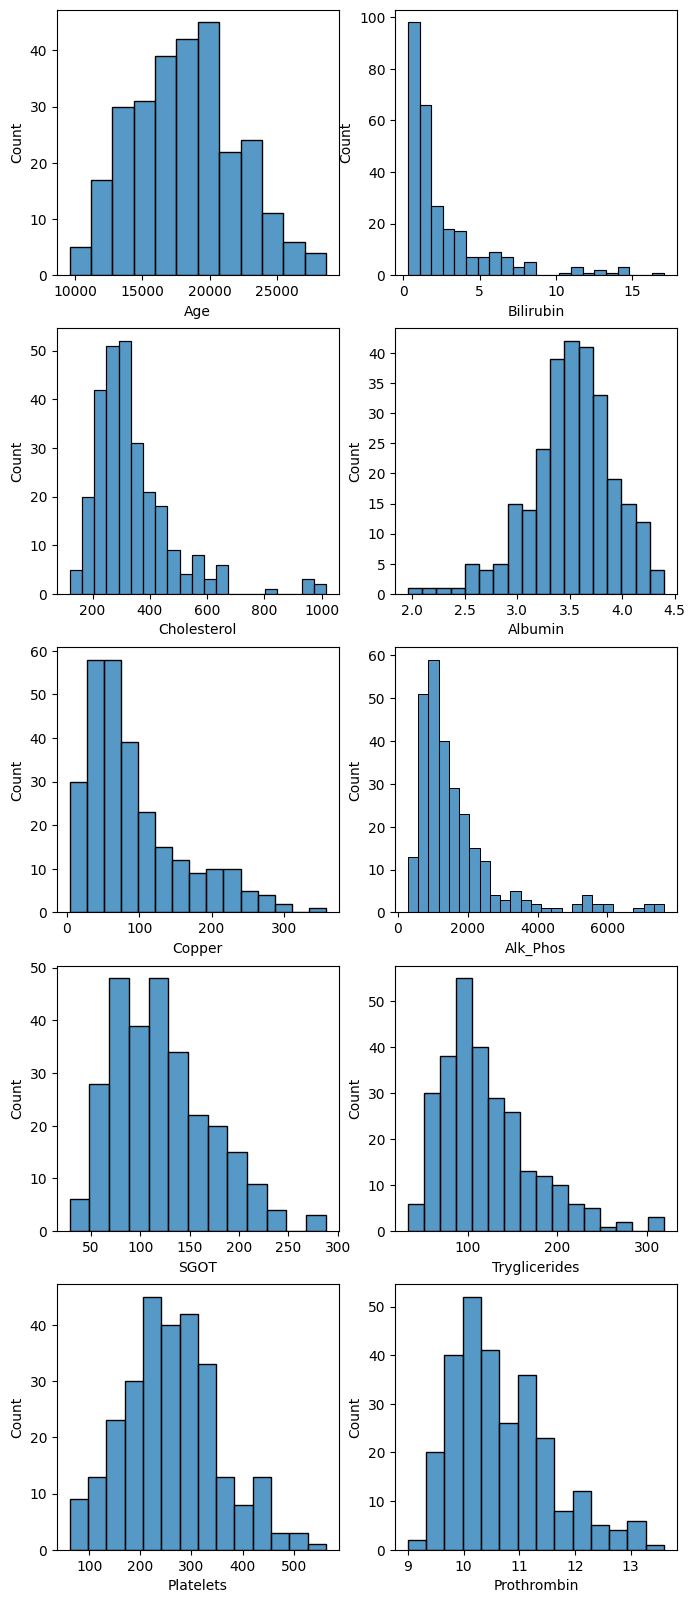

In [15]:
#Plots the graphs to see the changes
_, axes = plt.subplots(5, 2, figsize = (8, 5*4))
for index, col in enumerate(quant_vars):
    hor = index%2
    ver = index//2
    sns.histplot(data = cirr_df[col], ax = axes[ver, hor])

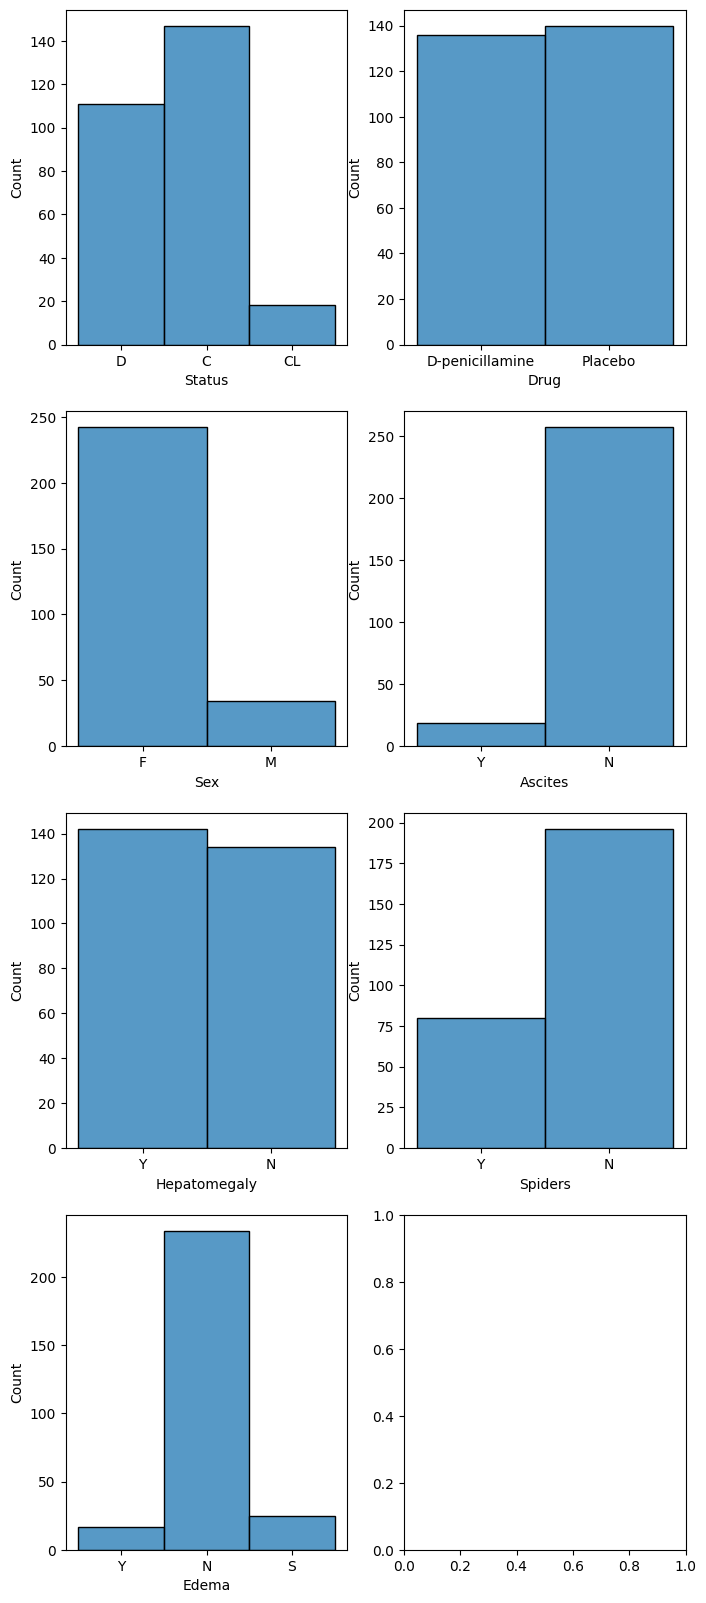

In [16]:
#Graphs the Qualitative Variables
qual_vars = ["Status","Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]
_, axes = plt.subplots(4, 2, figsize = (8, 20))
for index, col in enumerate(qual_vars):
    hor = index%2
    ver = index//2
    sns.histplot(data = cirr_df[col], ax = axes[ver, hor])

You can see that the outliers have been removed from the dataset and set as the median

In [17]:
#Encodes the Qualitative variables with numbers
number = LabelEncoder()

cirr_df["Sex"] = number.fit_transform(cirr_df["Sex"])
cirr_df["Ascites"] = number.fit_transform(cirr_df["Ascites"])
cirr_df["Hepatomegaly"] = number.fit_transform(cirr_df["Hepatomegaly"])
cirr_df["Spiders"] = number.fit_transform(cirr_df["Spiders"])
cirr_df["Edema"] = number.fit_transform(cirr_df["Edema"])
cirr_df["Drug"] = number.fit_transform(cirr_df["Drug"])

<ipython-input-18-418ea819239f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cirr_df.corr()


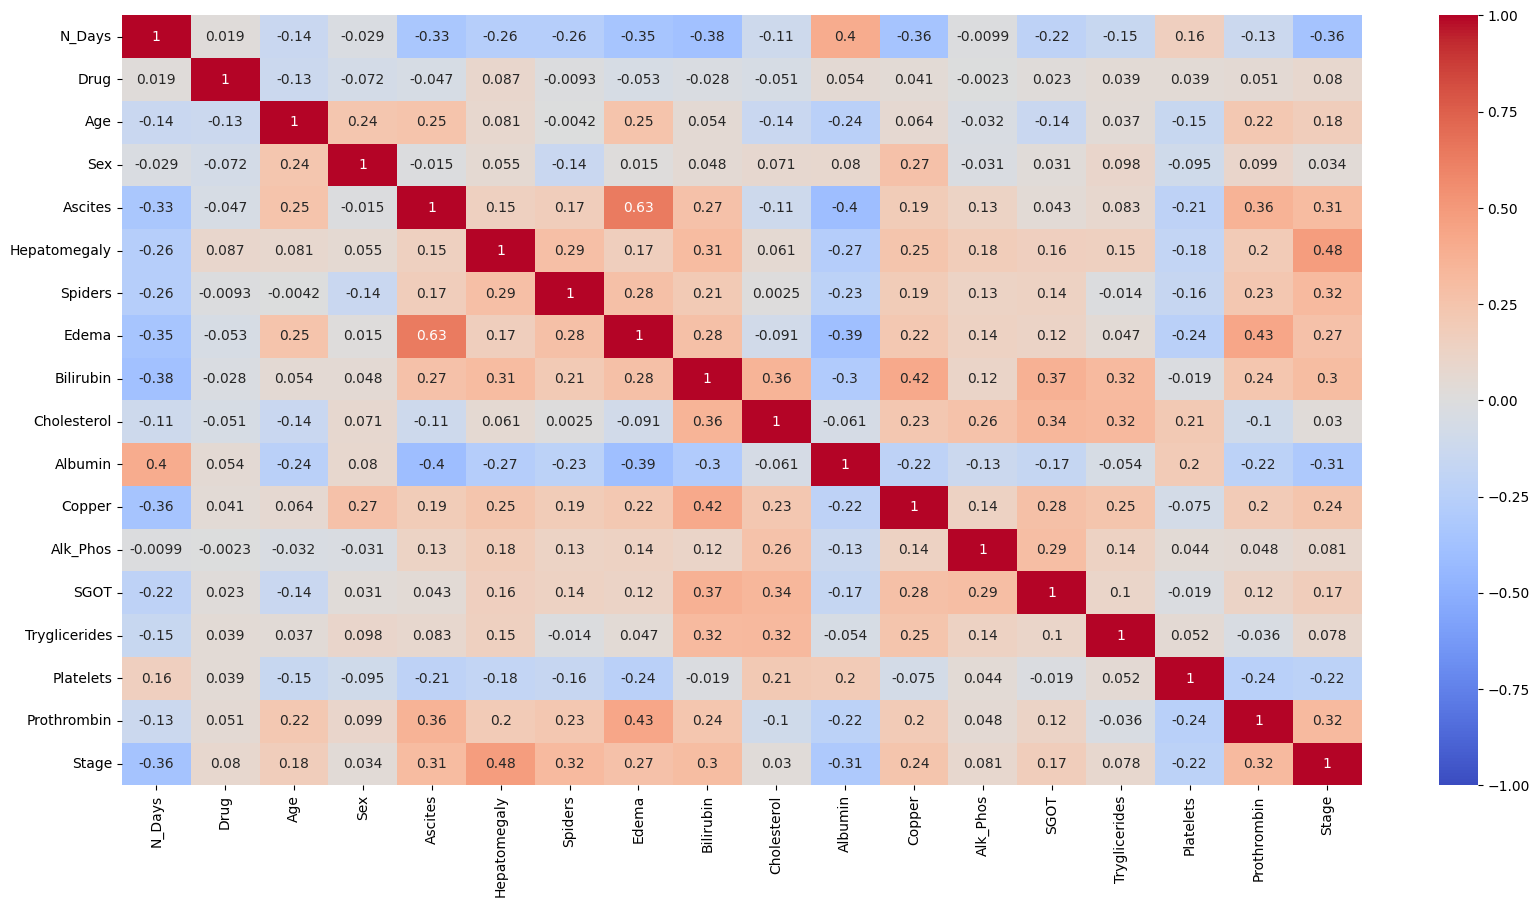

In [18]:
#Checking the correlations to see if any variables can be eliminated
corr = cirr_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=False, annot=True, cmap='coolwarm')
plt.show()

##Models

In [19]:
cirr_df.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [20]:
#Defines the features and the target variables
features = ["N_Days","Drug","Age","Sex","Ascites","Hepatomegaly","Spiders","Edema","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Prothrombin","Stage","Platelets"]
target = "Status"

In [21]:
#Splits the data set into training and validation
X_train, X_val, y_train, y_val = train_test_split(cirr_df[features],
                                                                           cirr_df[target],
                                                                           test_size = .20,
                                                                           random_state = 50)

###Decision Tree, Random Forest, and Gradient Boosting Classifiers

In [22]:
#Fits the models, and calculate the accuracy
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 1.0
Validation Accuracy: 0.7857142857142857


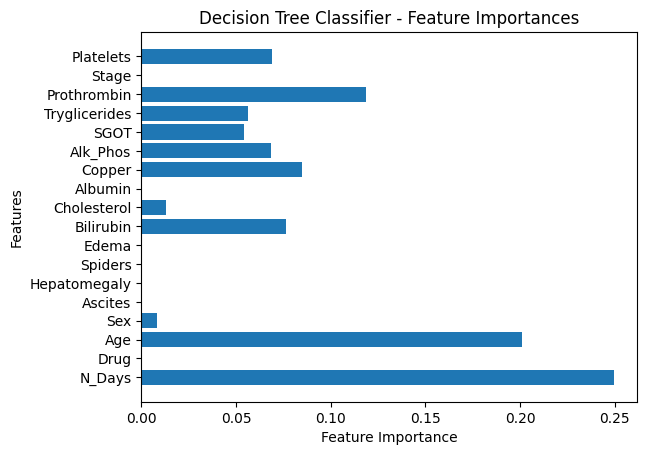

In [23]:
feature_importances = model.feature_importances_

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Classifier - Feature Importances')
plt.show()

In [24]:
#Fits the models, and calculate the accuracy
model_2 = RandomForestClassifier(n_estimators=100,max_depth=10,
                                 min_samples_split=5, min_samples_leaf=2)
model_2.fit(X_train, y_train)

train_predictions = model_2.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

val_predictions = model_2.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.9636363636363636
Validation Accuracy: 0.875


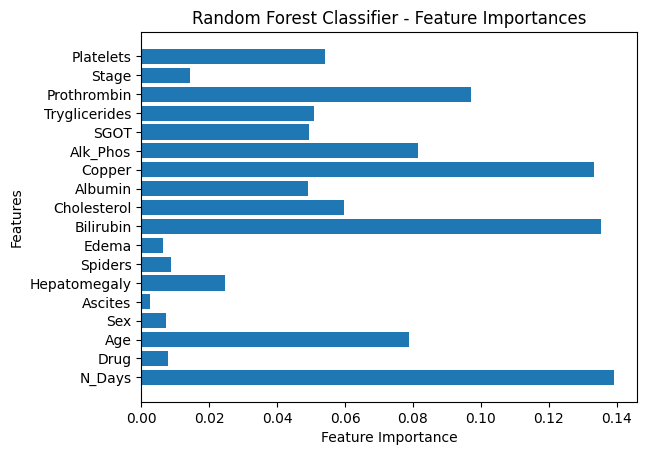

In [25]:
feature_importances = model_2.feature_importances_

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importances')
plt.show()

In [26]:
#Fits the models, and calculate the accuracy
model_3 = GradientBoostingClassifier(n_estimators=100,max_depth=3)

model_3.fit(X_train, y_train)

train_predictions = model_3.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

val_predictions = model_3.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 1.0
Validation Accuracy: 0.8214285714285714


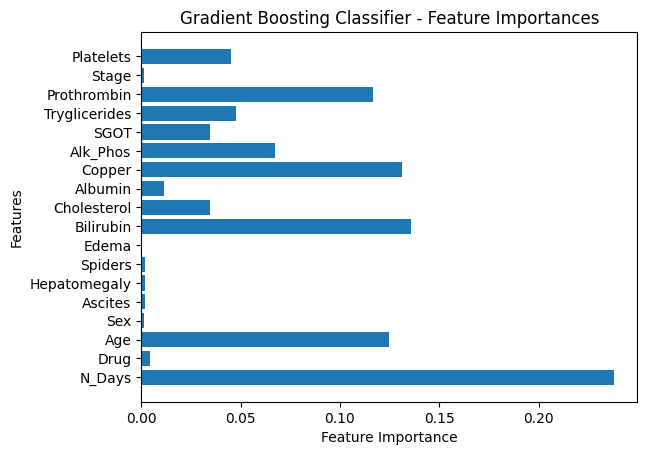

In [27]:
feature_importances = model_3.feature_importances_

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Classifier - Feature Importances')
plt.show()

Based off the graphs of feature importance Albumin, Edema, Spiders, Ascites, Sex and the drug used are not important in forming prediction. So, they were removed from the features and the models were run again to see the new accuarcy scores.

In [28]:
features = ["N_Days","Age","Bilirubin","Cholesterol","Copper","Alk_Phos","SGOT","Tryglicerides","Prothrombin","Stage","Platelets"]

In [29]:
X_train, X_val, y_train, y_val = train_test_split(cirr_df[features],
                                                                           cirr_df[target],
                                                                           test_size = .20,
                                                                           random_state = 50)

In [30]:
#Fits the models, and calculate the accuracy
model_2 = RandomForestClassifier(n_estimators=100,max_depth=10,
                                 min_samples_split=5, min_samples_leaf=2)
model_2.fit(X_train, y_train)

train_predictions = model_2.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

val_predictions = model_2.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.9727272727272728
Validation Accuracy: 0.8928571428571429


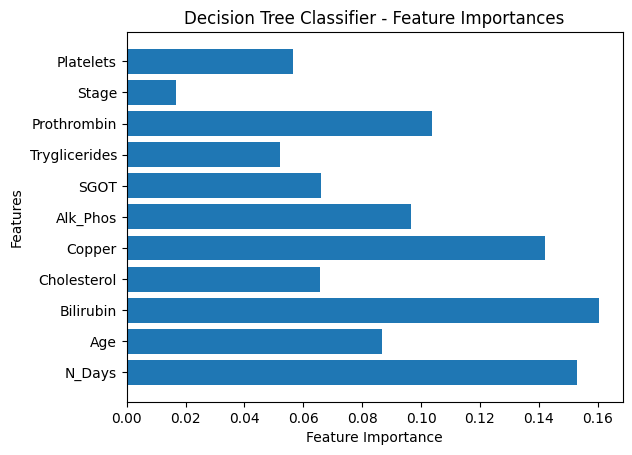

In [31]:
feature_importances = model_2.feature_importances_

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Classifier - Feature Importances')
plt.show()

In [32]:
#Fits the models, and calculate the accuracy
model_3 = GradientBoostingClassifier(n_estimators=100,max_depth=3)

model_3.fit(X_train, y_train)

train_predictions = model_3.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

val_predictions = model_3.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 1.0
Validation Accuracy: 0.8214285714285714


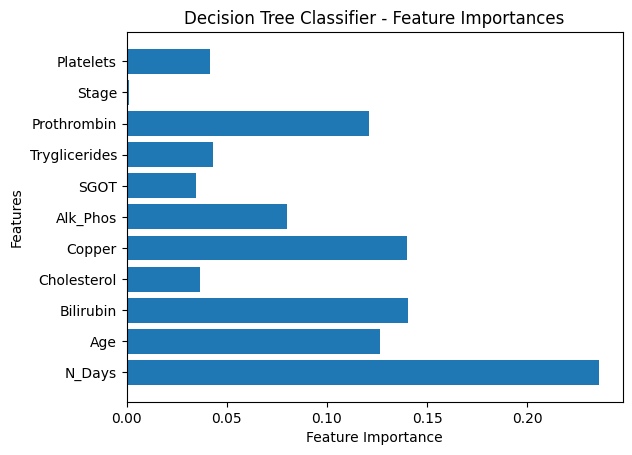

In [33]:
feature_importances = model_3.feature_importances_

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Classifier - Feature Importances')
plt.show()

In [34]:
#Fits the models, and calculate the accuracy
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 1.0
Validation Accuracy: 0.7678571428571429


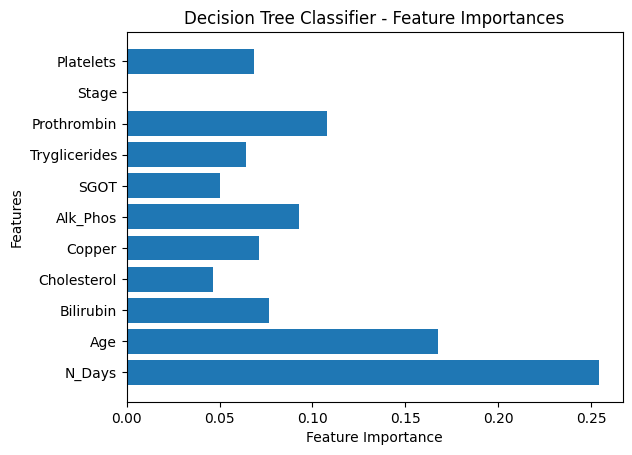

In [35]:
feature_importances = model.feature_importances_

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Classifier - Feature Importances')
plt.show()

#Summary

###Data Cleaing and Preprocessing

In the data preprocessing section, I first started by removing the ID column because it had no use in my analysis. Next I handled the the empty entries in the data set by removing them because I only wanted to use properly collected data. Next, I had to change the data types from strings to numeric data types.

###Exploritory Data Analysis

In the EDA section, the outliers were examined in the dataset by graphing histograms of the different features. It was shown that there were significant amounts of outliers in the dataset, and they were replaced with the median of the given feature. Next, the nominal and ordinal were encoded and a correlation analysis was done to see if any feature could be removed. None of the correlations was above .7, so they were all deemed important at that time.


###Decision Tree, Random Forest, and Gradient Boosting Classifiers

These different models were implemented with all the features and the feature importance histograms were graphed. Next, the accuracy scores were examined and the Random Forest Classifier performed the best compared to the other models. Looking at the feature importance for the models, the drug feature was not deemed important by the model. Looking at the correlation of the drug and the other features, which was close to zero, this could mean that the drug was not effective. Further examination would need to be done to see if the drug was effective.